In [286]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats

In [287]:
# import data visualisation tools
import matplotlib.pyplot as plt
import seaborn as sns
from termcolor import colored

In [288]:
# create data
np.random.seed(1)
x1 = pd.DataFrame(np.array([np.random.uniform(size = 100)]))
x2 = pd.DataFrame(0.5*x1+np.random.standard_normal(size = 100)/10)
y = pd.DataFrame(2+2*x1+0.3*x2+np.random.standard_normal(size = 100))

In [289]:
x1T= x1.T
x1T.columns = ['x1']
x2T = x2.T
x2T.columns = ['x2']
yT = y.T
yT.columns = ['y']

**14.a. y = 2 + 2*x1 + 0.3*x2 + epsilon~N(0,1)
<br>
Beta_0 = 2
<br>
Beta_1 = 2
<br>
Beta_2 = 0.3**

In [290]:
corrx1x2 = np.corrcoef(x1, x2)[0, 1]
print("Correlation between x1 and x2 is: %f\n" % corrx1x2)

Correlation between x1 and x2 is: 0.839060



Text(0,0.5,'y1')

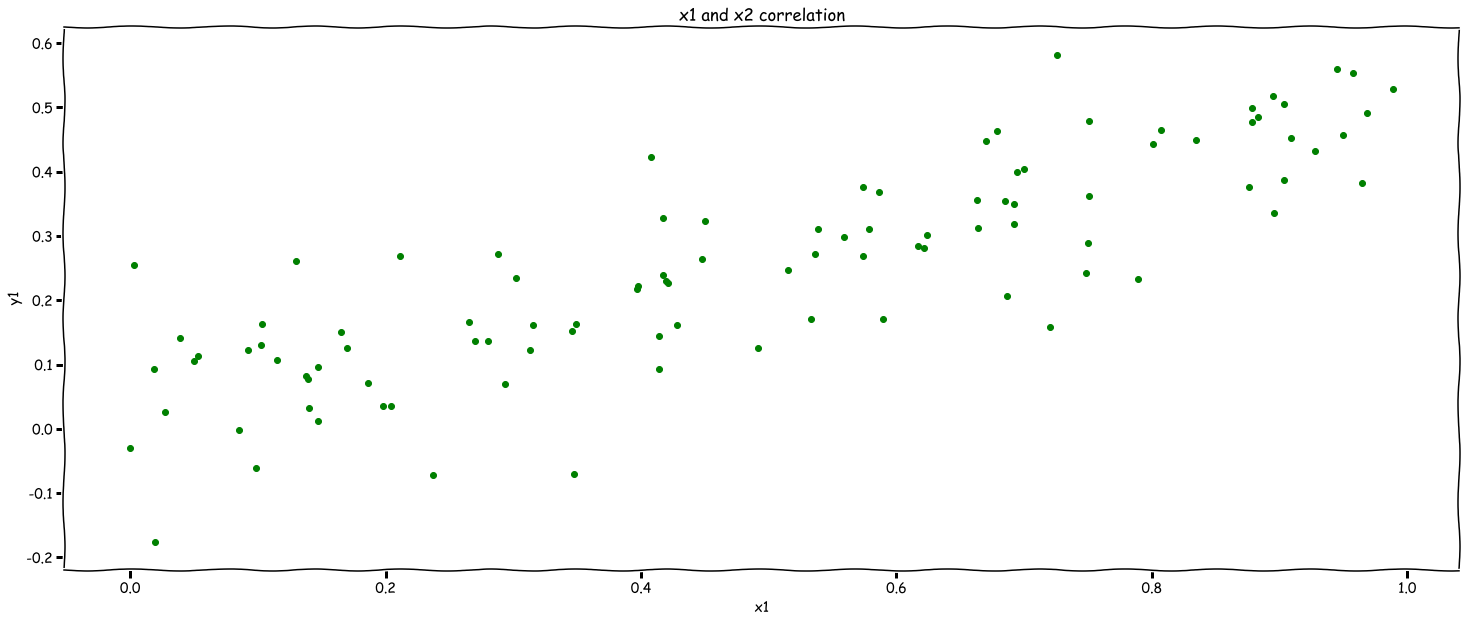

In [291]:
plt.xkcd()
plt.figure(figsize = (25, 10))
plt.scatter(x1, x2, color = 'g')
plt.title("x1 and x2 correlation")
plt.xlabel("x1")
plt.ylabel("y1")

In [292]:
# 14.c. run regression#1
X1T = sm.add_constant(x1T)
data = pd.concat([x1T, x2T, yT], axis = 1)
reg_1 = ols("yT~x1T+x2T", data = data).fit()

In [293]:
reg_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     yT   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     17.09
Date:                Wed, 09 Jan 2019   Prob (F-statistic):           4.40e-07
Time:                        22:40:16   Log-Likelihood:                -142.34
No. Observations:                 100   AIC:                             290.7
Df Residuals:                      97   BIC:                             298.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1893      0.199     11.021      0.000       1.795       2.584
x1T            0.7046      0.637      1.107      0.271      -0.559       1.968
x2T            2.5024      1.140      2.194      0.031       0.239       4.766
==============================================================================
Omnibus:                        0.607   Durbin-Watson:                   2.111
Prob(Omnibus):                  0.738   Jarque-Bera (JB):                0.577
Skew:                          -0.179   Prob(JB):                        0.749
Kurtosis:                       2.900   Cond. No.                         14.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Beta_hat_0 = 2.1893
<br>
Beta_hat_1 = 0.7046
<br>
Beta_hat_2 = 2.5024
<br>
Since the p-value of Beta_1 is large, we will reject the null-hypothesis that H_0:Beta_1 = 0. Since the the p-value of Beta_2 is small, we will fail to reject the null-hypothesis that H_0:Beta_2 = 0. However, we could reject it too given the p-value is not too small either.**

In [294]:
# 14.d. run regression#2
reg_2 = ols("yT~x1T", data = data).fit()

In [295]:
reg_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     yT   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     28.26
Date:                Wed, 09 Jan 2019   Prob (F-statistic):           6.68e-07
Time:                        22:42:09   Log-Likelihood:                -144.76
No. Observations:                 100   AIC:                             293.5
Df Residuals:                      98   BIC:                             298.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2486      0.201     11.209      0.000       1.850       2.647
x1T            1.8770      0.353      5.316      0.000       1.176       2.578
==============================================================================
Omnibus:                        0.292   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.864   Jarque-Bera (JB):                0.468
Skew:                          -0.003   Prob(JB):                        0.791
Kurtosis:                       2.665   Cond. No.                         4.26
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Beta_hat_0 = 2.2486
<br>
Beta_hat_1 = 1.8770
<br>
Since the p-value of Beta_1 is ~ 0, we will fail to reject the null-hypothesis that H_0:Beta_1 = 0. This is not surprising given the high correlation between
x1 and x2. Multicollinearity supresses the individual effects of each independent variable.**

In [296]:
# 14.3. run regression#3
reg_3 = ols("yT~x2T", data = data).fit()

In [297]:
reg_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     yT   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     32.87
Date:                Wed, 09 Jan 2019   Prob (F-statistic):           1.09e-07
Time:                        22:43:12   Log-Likelihood:                -142.97
No. Observations:                 100   AIC:                             289.9
Df Residuals:                      98   BIC:                             295.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2655      0.187     12.145      0.000       1.895       2.636
x2T            3.5613      0.621      5.733      0.000       2.329       4.794
==============================================================================
Omnibus:                        0.857   Durbin-Watson:                   2.117
Prob(Omnibus):                  0.651   Jarque-Bera (JB):                0.746
Skew:                          -0.210   Prob(JB):                        0.689
Kurtosis:                       2.946   Cond. No.                         6.48
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Beta_hat_0 = 2.2655
<br>
Beta_hat_1 = 3.5613
<br>
Since the p-value of Beta_2 is ~ 0, we will fail to reject the null-hypothesis that H_0:Beta_12= 0. This is not surprising given the high correlation between
x1 and x2. Multicollinearity supresses the individual effects of each independent variable.**

**14.f. No. It is not contradictory. This is due to collinearity as explained above.**

In [298]:
# 14.g. additional observation
add_values = pd.DataFrame([0.1, 0.8, 6.0]).T
add_values.columns = ['x1','x2','y']
data = data.append(add_values, ignore_index = False)

In [299]:
reg_4 = ols("y~x1+x2", data = data).fit()

In [300]:
reg_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     19.92
Date:                Wed, 09 Jan 2019   Prob (F-statistic):           5.51e-08
Time:                        22:44:38   Log-Likelihood:                -144.15
No. Observations:                 101   AIC:                             294.3
Df Residuals:                      98   BIC:                             302.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1996      0.199     11.041      0.000       1.804       2.595
x1             0.2200      0.520      0.423      0.673      -0.812       1.252
x2             3.4392      0.892      3.857      0.000       1.670       5.209
==============================================================================
Omnibus:                        1.246   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.536   Jarque-Bera (JB):                1.094
Skew:                          -0.254   Prob(JB):                        0.579
Kurtosis:                       2.956   Cond. No.                         11.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [303]:
reg_5 = ols("y~x1", data = data).fit()

In [304]:
reg_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     21.89
Date:                Wed, 09 Jan 2019   Prob (F-statistic):           9.15e-06
Time:                        22:45:08   Log-Likelihood:                -151.28
No. Observations:                 101   AIC:                             306.6
Df Residuals:                      99   BIC:                             311.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3583      0.208     11.331      0.000       1.945       2.771
x1             1.7225      0.368      4.679      0.000       0.992       2.453
==============================================================================
Omnibus:                        1.904   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.386   Jarque-Bera (JB):                1.388
Skew:                           0.263   Prob(JB):                        0.500
Kurtosis:                       3.232   Cond. No.                         4.23
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [305]:
reg_6 = ols("y~x2", data = data).fit()

In [306]:
reg_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     39.99
Date:                Wed, 09 Jan 2019   Prob (F-statistic):           7.41e-09
Time:                        22:45:20   Log-Likelihood:                -144.24
No. Observations:                 101   AIC:                             292.5
Df Residuals:                      99   BIC:                             297.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2331      0.182     12.271      0.000       1.872       2.594
x2             3.7216      0.589      6.324      0.000       2.554       4.889
==============================================================================
Omnibus:                        1.271   Durbin-Watson:                   2.101
Prob(Omnibus):                  0.530   Jarque-Bera (JB):                1.094
Skew:                          -0.255   Prob(JB):                        0.579
Kurtosis:                       2.973   Cond. No.                         6.20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Adding the extra row certainly improves the significance of the second independent variable.**

Text(0,0.5,'residuals')

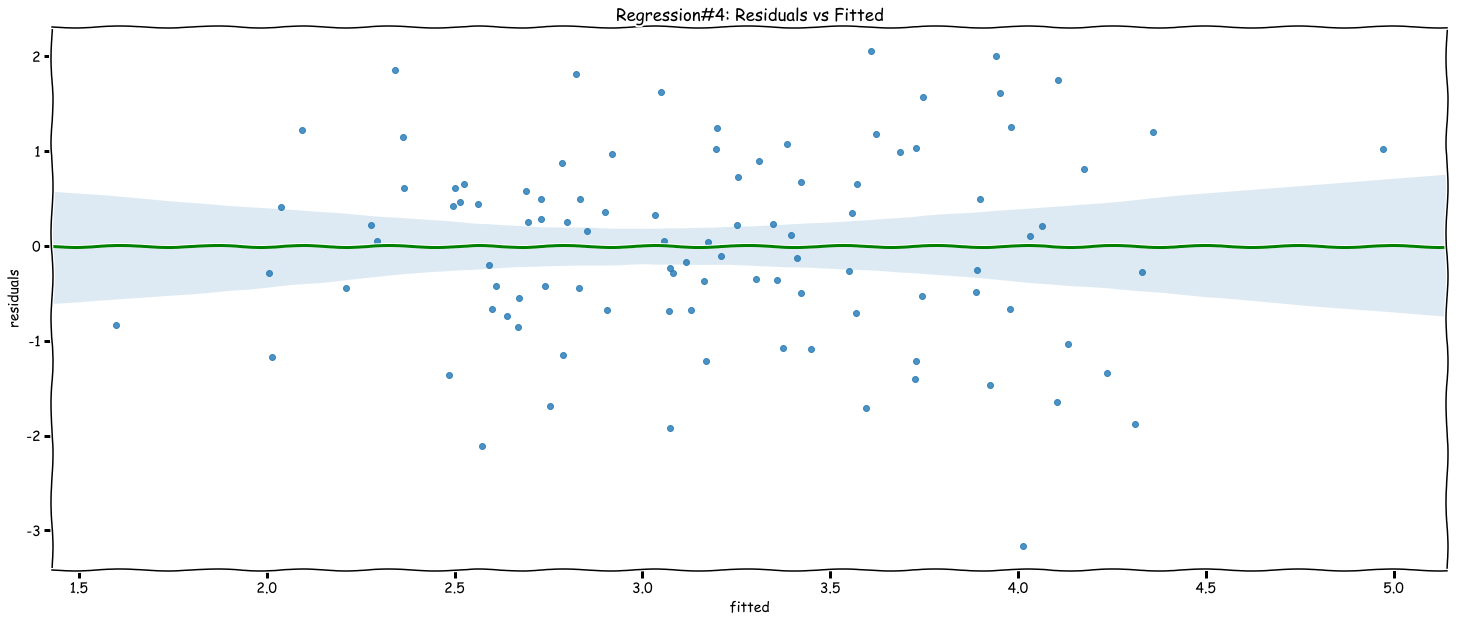

In [309]:
# regression#4: residuals vs fitted plot
plt.xkcd()
fitted_4 = pd.DataFrame([reg_4.predict()]).T
fitted_4.columns = ['fitted']
residuals_4 = reg_4.resid
data_4 = pd.concat([fitted_4, residuals_4.reset_index(drop=True)], axis = 1)
data_4.columns = ['fitted','residuals']
plt.figure(figsize = (25, 10))
reg_plot_4 = sns.regplot(fitted_4, residuals_4, data = data_4)
regline_4 = reg_plot_4.get_lines()[0]
regline_4.set_color('green')
plt.title("Regression#4: Residuals vs Fitted")
plt.xlabel("fitted")
plt.ylabel("residuals")

<Figure size 1080x720 with 0 Axes>

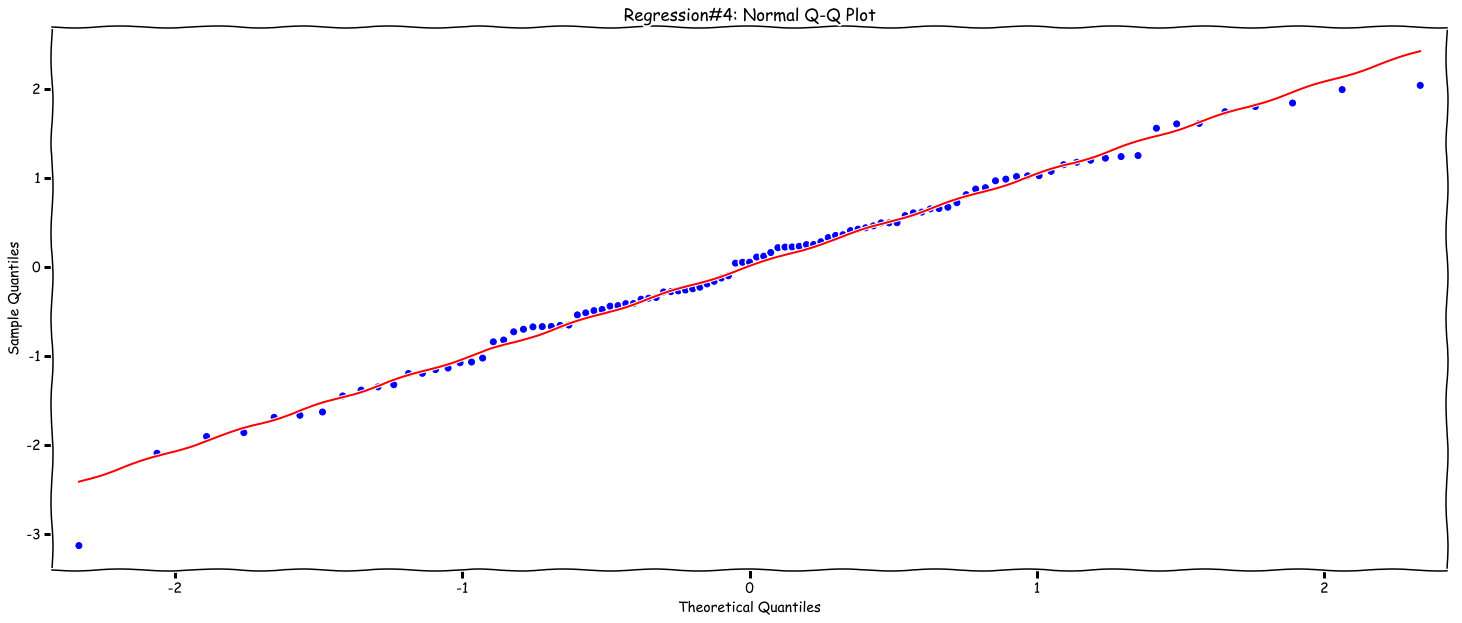

In [311]:
# regression#4: normal q-q plot
plt.figure(figsize = (15, 10))
sm.qqplot(reg_4.resid_pearson, fit = True, line = 'r') # another way to do it
plt.title("Regression#4: Normal Q-Q Plot")
fig = plt.gcf()
fig.set_size_inches(25, 10)
plt.show()

Text(0.5,1,'Regression#4: Scale-Location Plot')

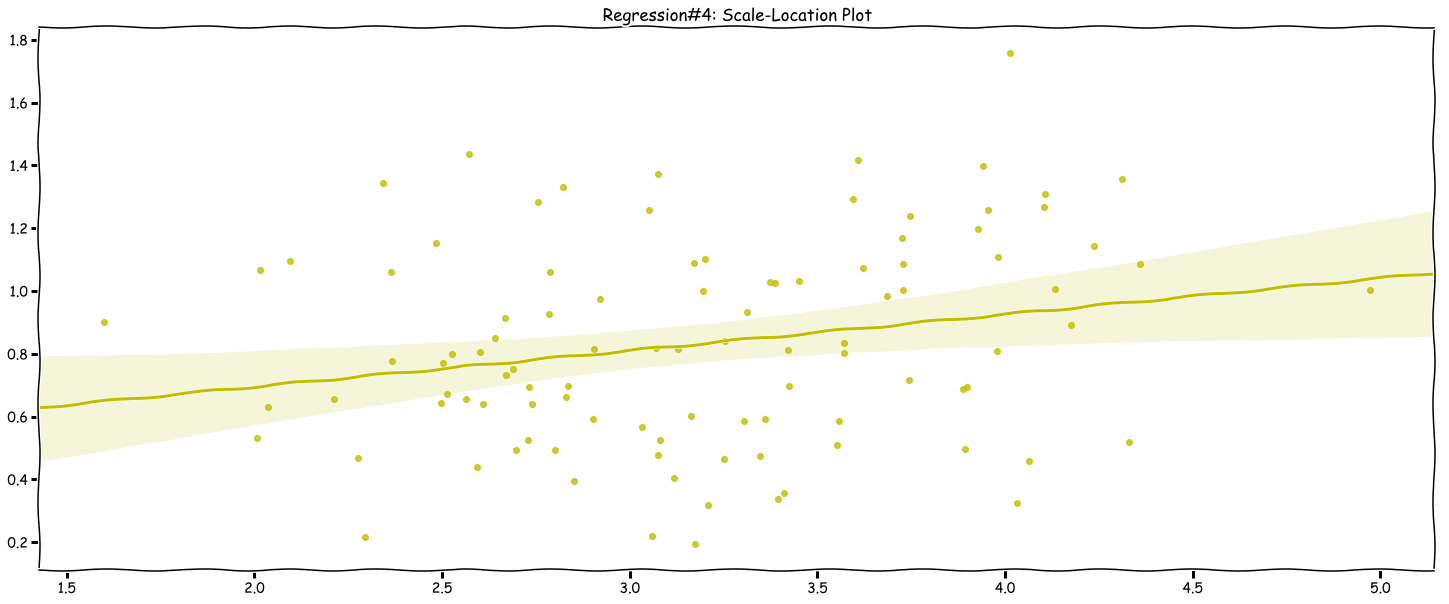

In [314]:
# regression#4: scale-location plot
plt.xkcd()
plt.figure(figsize = (25, 10))
sns.regplot(fitted_4, np.sqrt(np.abs(reg_4.resid_pearson)), fit_reg = True, color = 'y')
plt.title("Regression#4: Scale-Location Plot")

<Figure size 2160x720 with 0 Axes>

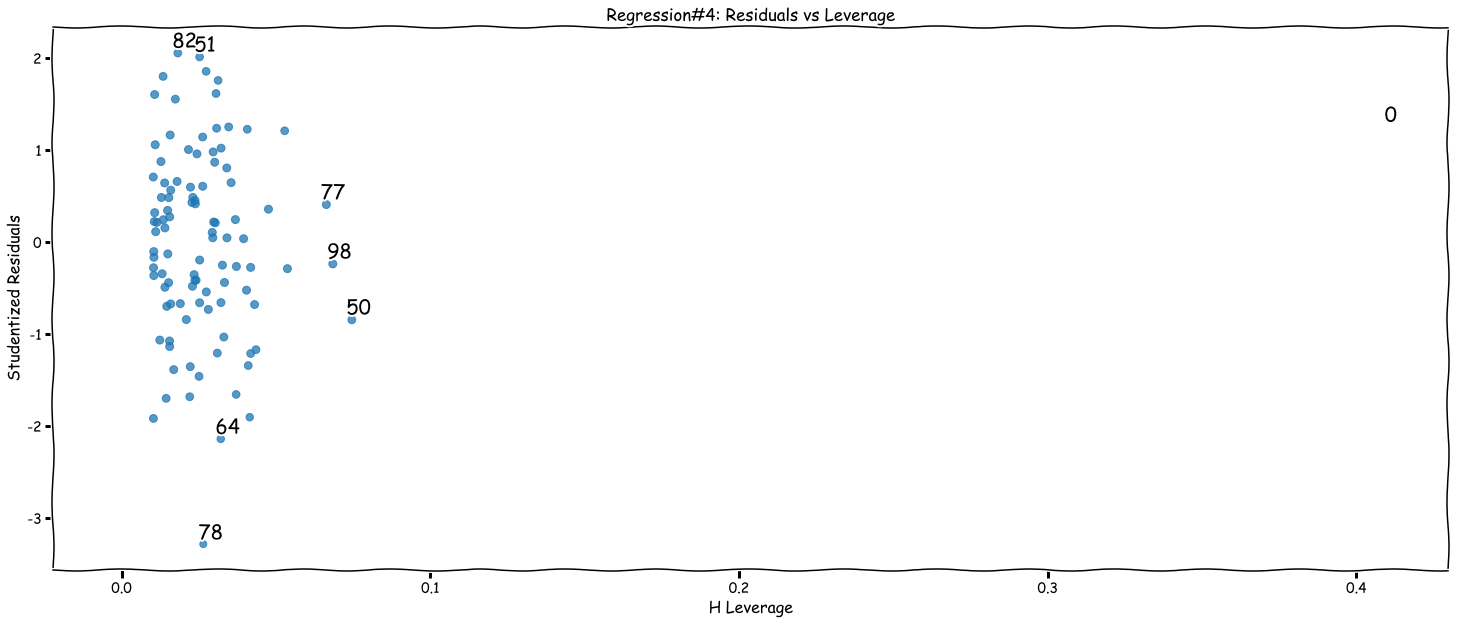

In [315]:
# regression#4: residuals vs leverage plot
plt.xkcd()
fig = plt.figure(figsize = (25, 10))
fig.set_size_inches(30, fig.get_figheight(), forward=True)
sm.graphics.influence_plot(reg_4, criterion="cooks", size = 0.0002**2)
plt.title("Regression#4: Residuals vs Leverage")
fig = plt.gcf()
fig.set_size_inches(25, 10)
plt.show()

Text(0,0.5,'residuals')

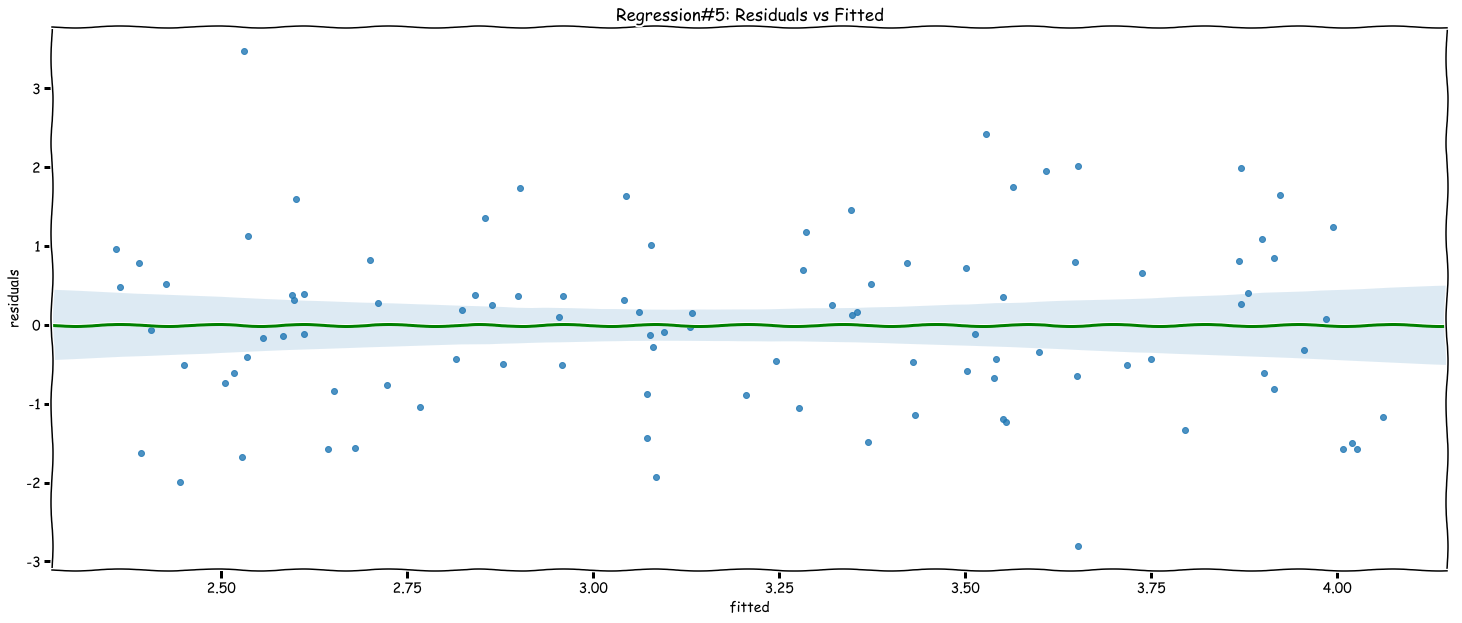

In [316]:
# regression#5: residuals vs fitted plot
plt.xkcd()
fitted_5 = pd.DataFrame([reg_5.predict()]).T
fitted_5.columns = ['fitted']
residuals_5 = reg_5.resid
data_5 = pd.concat([fitted_5, residuals_5.reset_index(drop=True)], axis = 1)
data_5.columns = ['fitted','residuals']
plt.figure(figsize = (25, 10))
reg_plot_5 = sns.regplot(fitted_5, residuals_5, data = data_5)
regline_5 = reg_plot_5.get_lines()[0]
regline_5.set_color('green')
plt.title("Regression#5: Residuals vs Fitted")
plt.xlabel("fitted")
plt.ylabel("residuals")

<Figure size 1800x720 with 0 Axes>

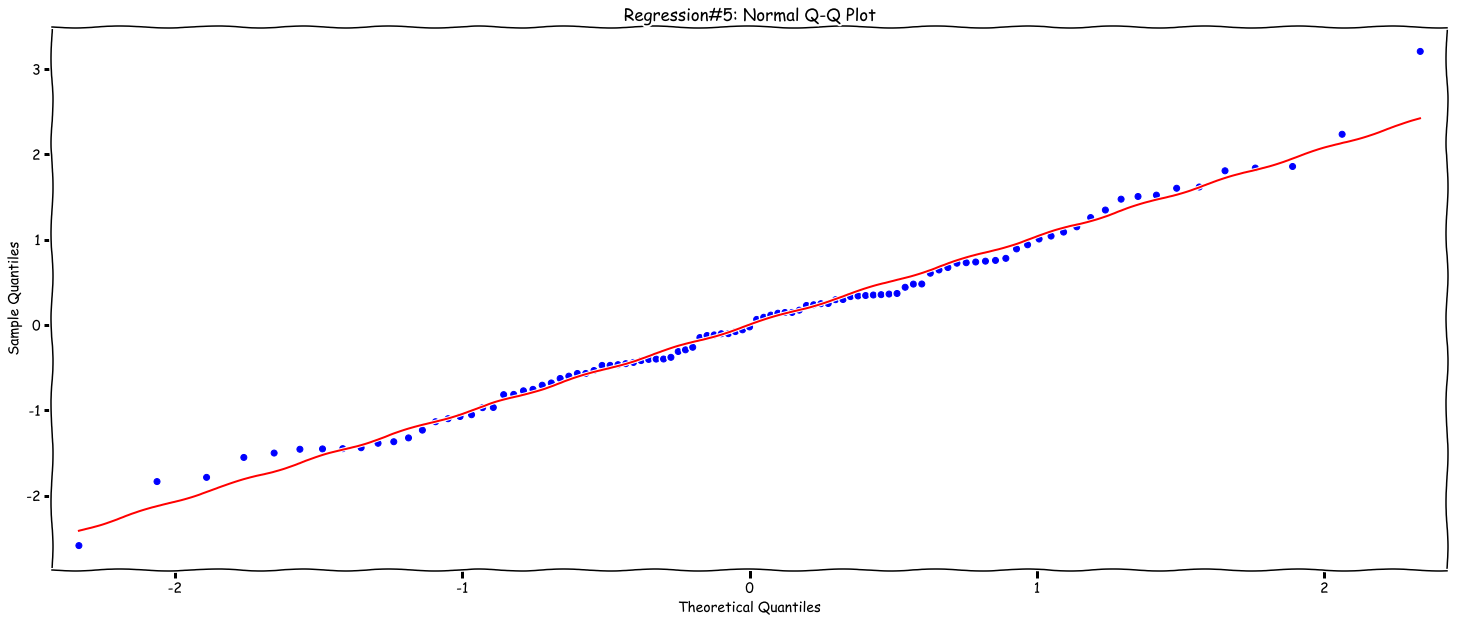

In [317]:
# regression#5: normal q-q plot
plt.figure(figsize = (25, 10))
sm.qqplot(reg_5.resid_pearson, fit = True, line = 'r') # another way to do it
plt.title("Regression#5: Normal Q-Q Plot")
fig = plt.gcf()
fig.set_size_inches(25, 10)
plt.show()

Text(0.5,1,'Regression#5: Scale-Location Plot')

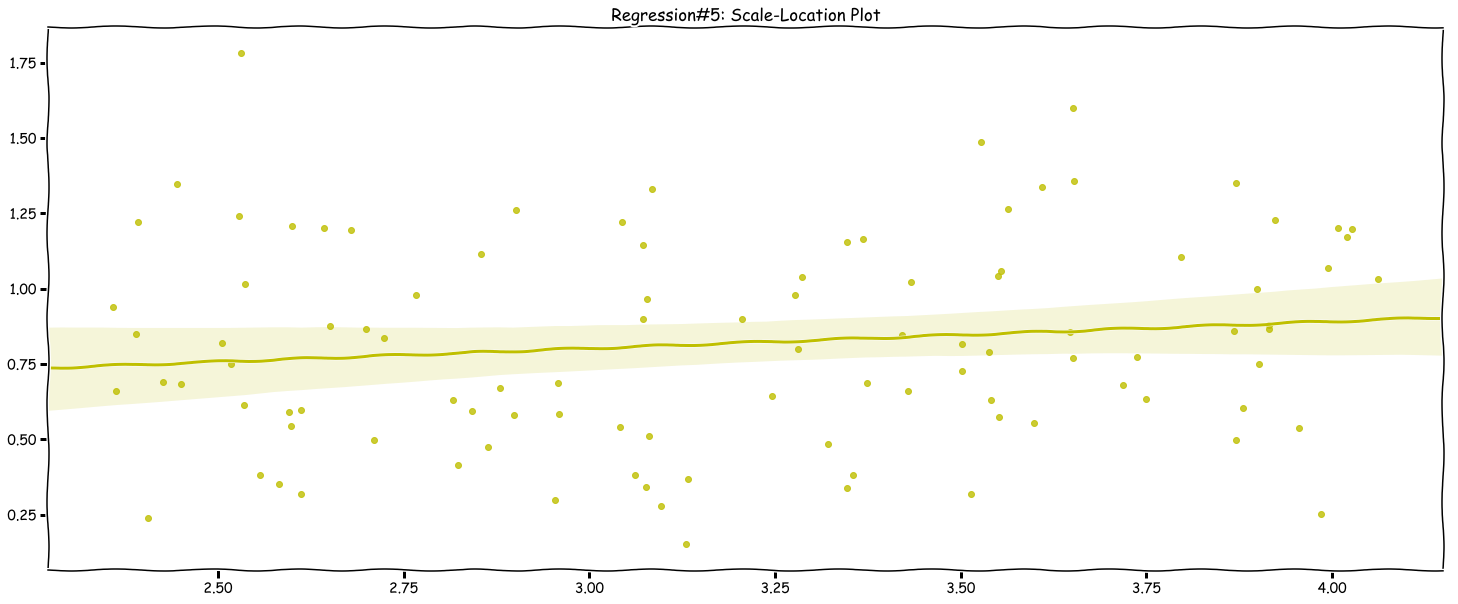

In [319]:
# regression#5: scale-location plot
plt.xkcd()
plt.figure(figsize = (25, 10))
sns.regplot(fitted_5, np.sqrt(np.abs(reg_5.resid_pearson)), fit_reg = True, color = 'y')
plt.title("Regression#5: Scale-Location Plot")

<Figure size 2160x720 with 0 Axes>

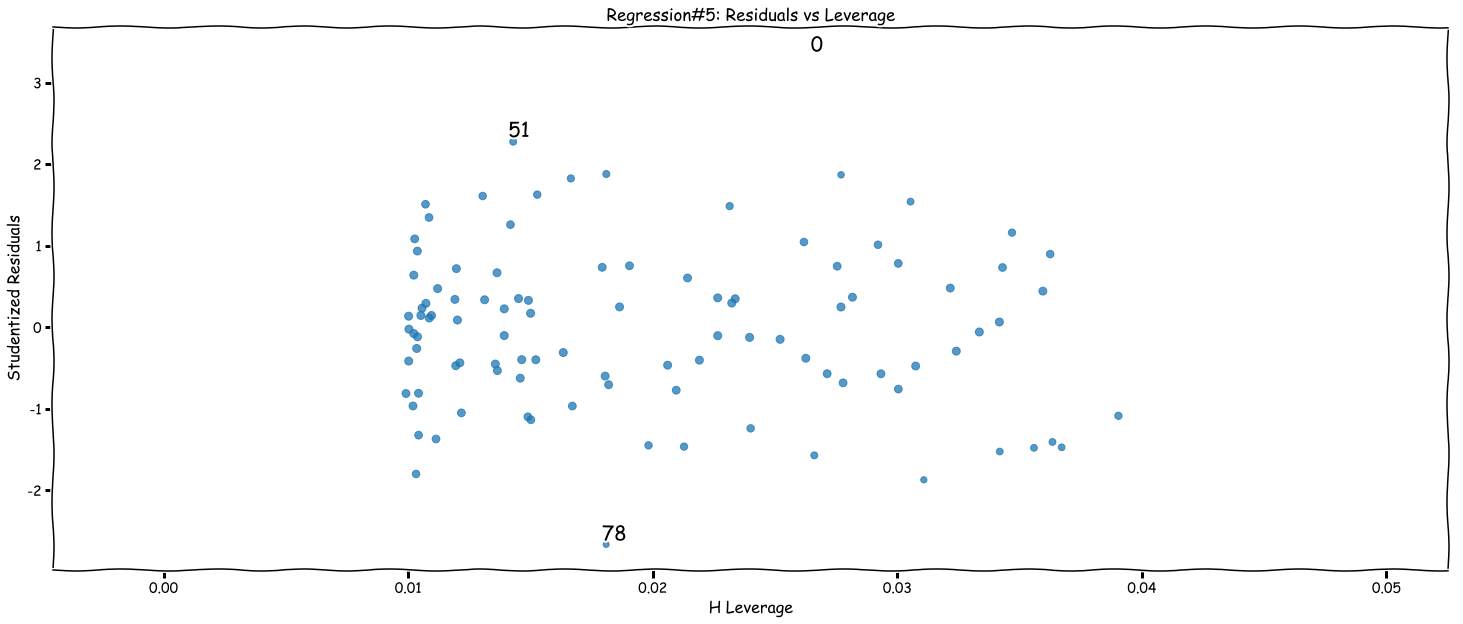

In [320]:
# regression#5: residuals vs leverage plot
plt.xkcd()
fig = plt.figure(figsize = (25, 10))
fig.set_size_inches(30, fig.get_figheight(), forward=True)
sm.graphics.influence_plot(reg_5, criterion="cooks", size = 0.0002**2)
plt.title("Regression#5: Residuals vs Leverage")
fig = plt.gcf()
fig.set_size_inches(25, 10)
plt.show()

Text(0,0.5,'residuals')

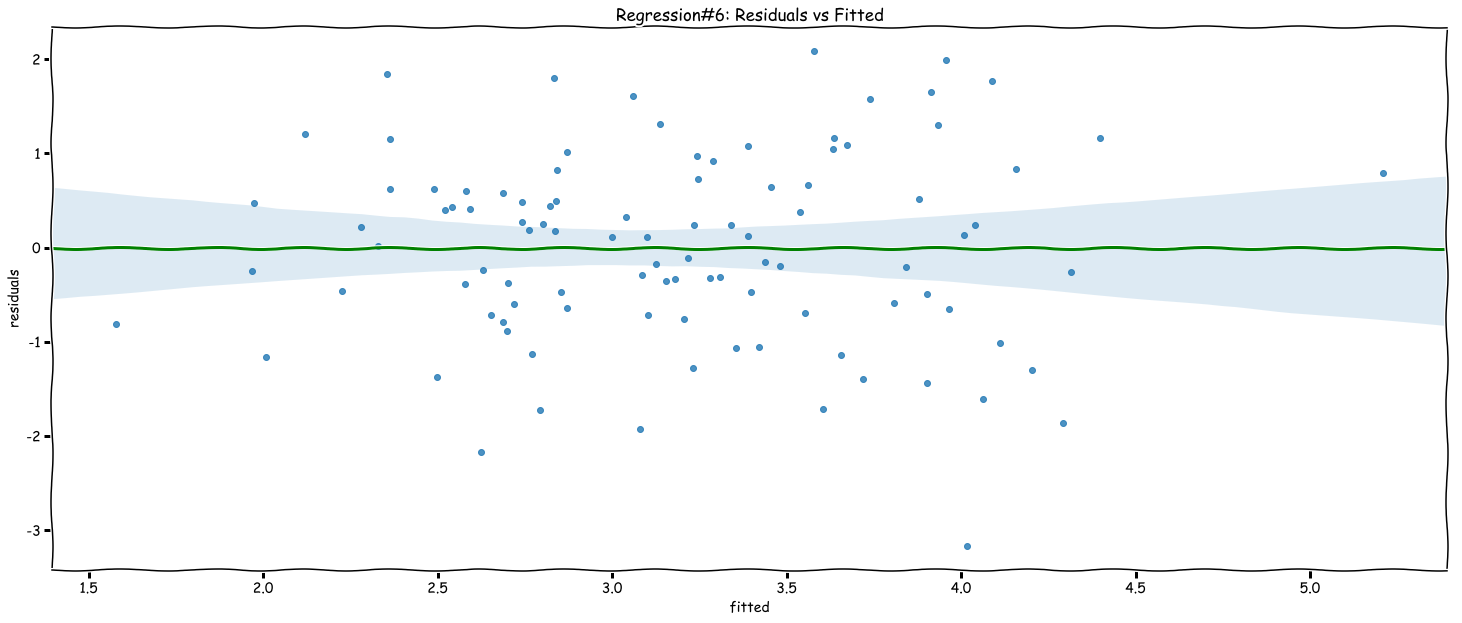

In [321]:
# regression#6: residuals vs fitted plot
plt.xkcd()
fitted_6 = pd.DataFrame([reg_6.predict()]).T
fitted_6.columns = ['fitted']
residuals_6 = reg_6.resid
data_6 = pd.concat([fitted_6, residuals_6.reset_index(drop=True)], axis = 1)
data_6.columns = ['fitted','residuals']
plt.figure(figsize = (25, 10))
reg_plot_6 = sns.regplot(fitted_6, residuals_6, data = data_6)
regline_6 = reg_plot_6.get_lines()[0]
regline_6.set_color('green')
plt.title("Regression#6: Residuals vs Fitted")
plt.xlabel("fitted")
plt.ylabel("residuals")

<Figure size 1800x720 with 0 Axes>

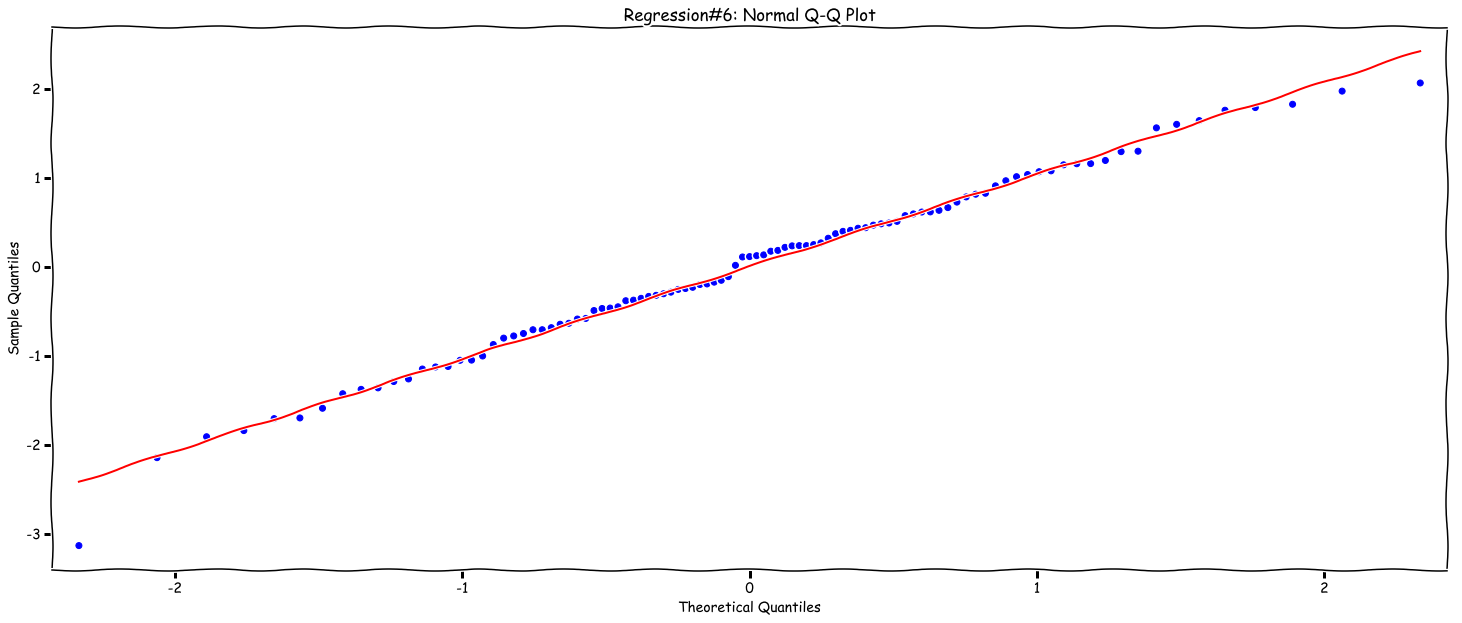

In [322]:
# regression#5: normal q-q plot
plt.figure(figsize = (25, 10))
sm.qqplot(reg_6.resid_pearson, fit = True, line = 'r') # another way to do it
plt.title("Regression#6: Normal Q-Q Plot")
fig = plt.gcf()
fig.set_size_inches(25, 10)
plt.show()

Text(0.5,1,'Regression#6: Scale-Location Plot')

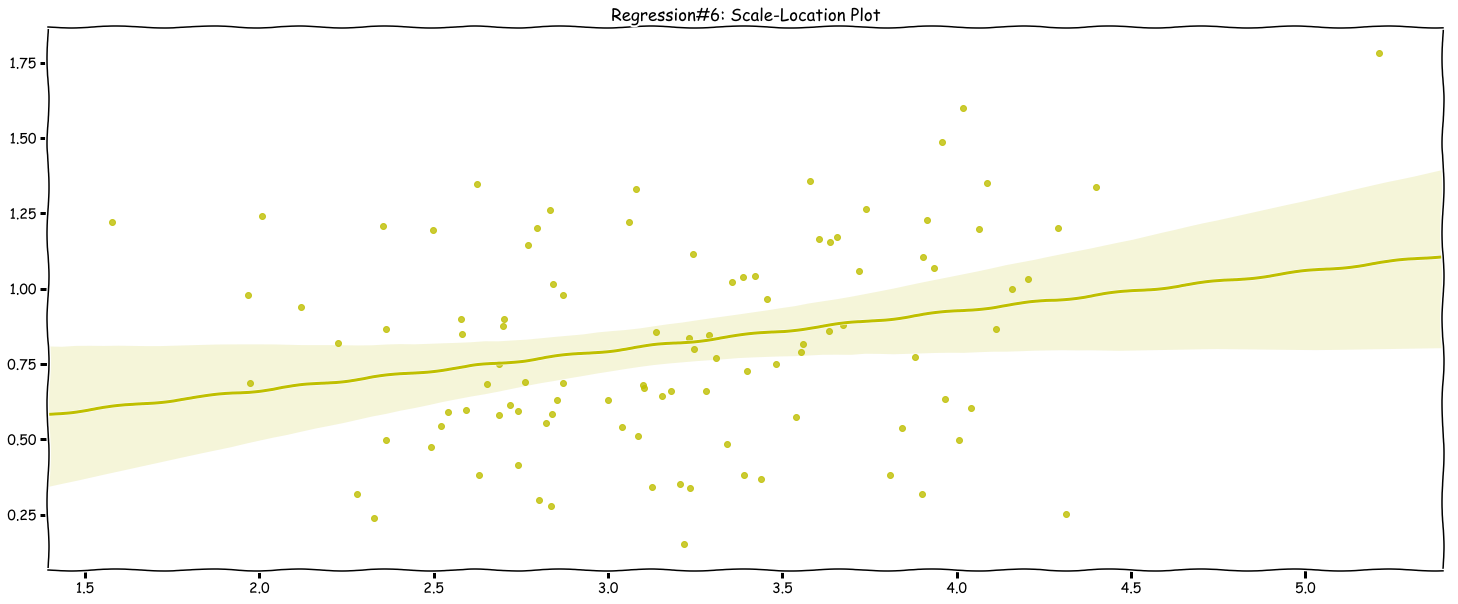

In [324]:
# regression#5: scale-location plot
plt.xkcd()
plt.figure(figsize = (25, 10))
sns.regplot(fitted_6, np.sqrt(np.abs(reg_5.resid_pearson)), fit_reg = True, color = 'y')
plt.title("Regression#6: Scale-Location Plot")

<Figure size 2160x720 with 0 Axes>

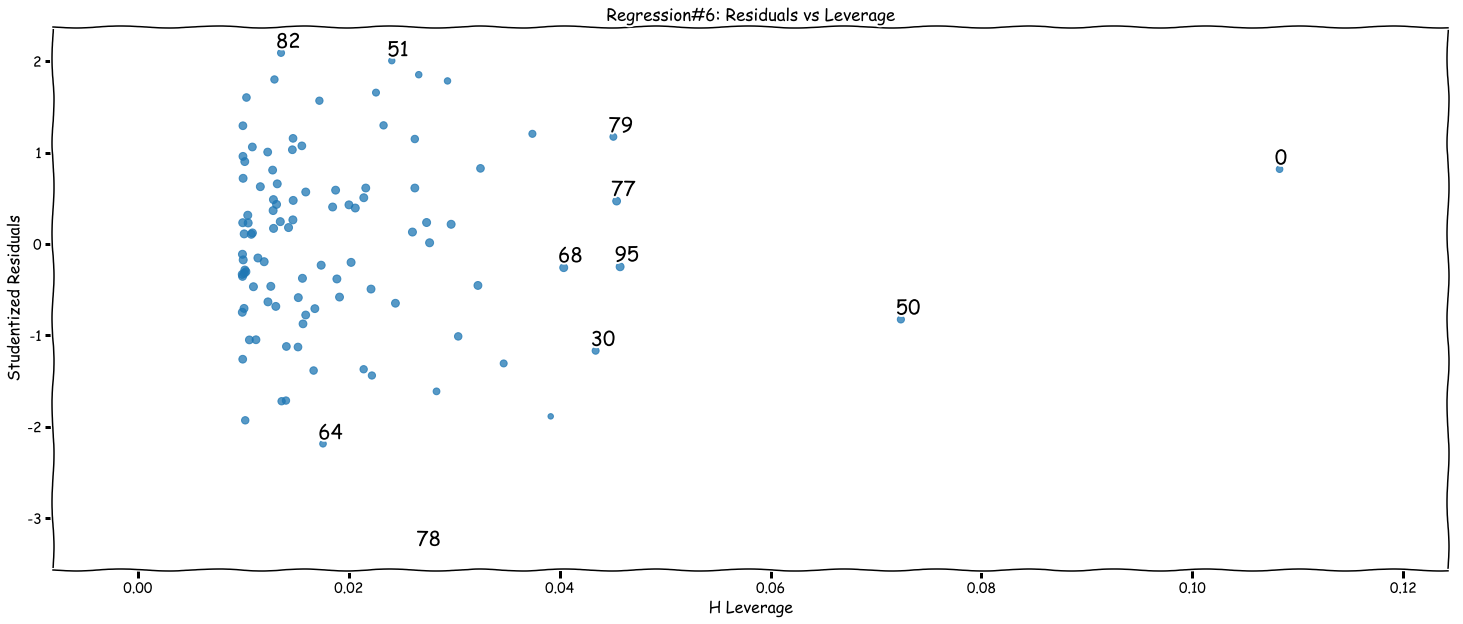

In [325]:
# regression#5: residuals vs leverage plot
plt.xkcd()
fig = plt.figure(figsize = (25, 10))
fig.set_size_inches(30, fig.get_figheight(), forward=True)
sm.graphics.influence_plot(reg_6, criterion="cooks", size = 0.0002**2)
plt.title("Regression#6: Residuals vs Leverage")
fig = plt.gcf()
fig.set_size_inches(25, 10)
plt.show()

**In the first and third model, point 0 is high leverage. The second model does not have any high leverage point, but points 51 and 78 are outliers.
Likewise, in the third model, points 82, 51, 78 are outliers.**